# AquaMind – Análise Exploratória de Dados (EDA)

Neste notebook carregamos e visualizamos os dados de umidade do solo coletados pelos sensores ESP32, buscando padrões, outliers e valores faltantes.


In [6]:
# 📦 1. Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 📥 2. Carregar dados
df = pd.read_csv('../data/sensor_data.csv', parse_dates=['timestamp'])
df.head()

,timestamp,soil_moisture,temperature
0,2025-01-01 00:00:00,40.993428,29.657312
1,2025-01-01 00:15:00,39.863925,29.628340
2,2025-01-01 00:30:00,41.576258,28.591612
3,2025-01-01 00:45:00,43.467311,29.220211
4,2025-01-01 01:00:00,40.093232,28.885917


In [8]:
# ℹ️ 3. Estatísticas descritivas
print(df.describe())

                 timestamp  soil_moisture  temperature
count                  672     672.000000   672.000000
mean   2025-01-04 11:52:30      42.101995    25.093858
min    2025-01-01 00:00:00      27.212388    17.765870
25%    2025-01-02 17:56:15      36.208377    21.788541
50%    2025-01-04 11:52:30      43.454861    25.178840
75%    2025-01-06 05:48:45      48.111726    28.351150
max    2025-01-07 23:45:00      54.925142    31.911882
std                    NaN       6.960774     3.619393


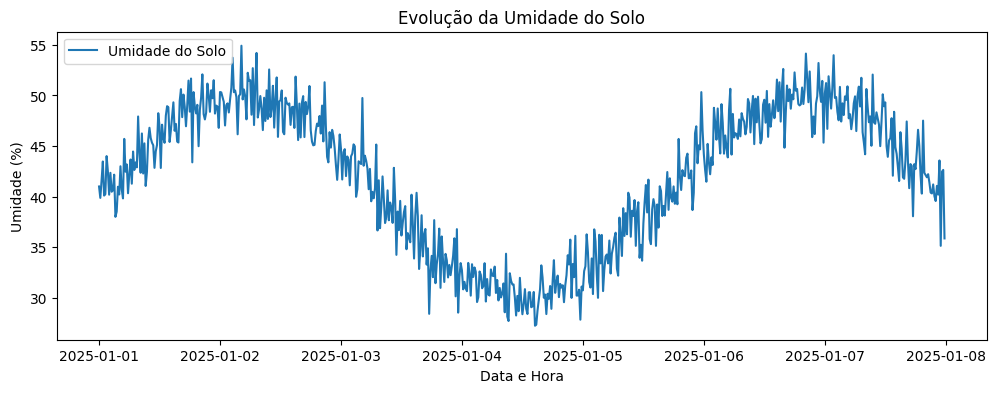

In [9]:
# 📈 4. Gráfico de série temporal de umidade
plt.figure(figsize=(12, 4))
plt.plot(df['timestamp'], df['soil_moisture'], label='Umidade do Solo')
plt.xlabel('Data e Hora')
plt.ylabel('Umidade (%)')
plt.title('Evolução da Umidade do Solo')
plt.legend()
plt.show()

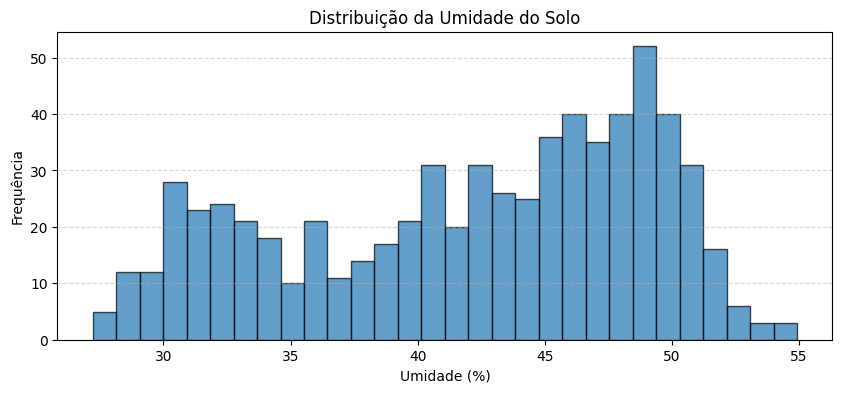

In [10]:
# 6. Histograma da distribuição da umidade do solo
plt.figure(figsize=(10,4))
plt.hist(df['soil_moisture'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição da Umidade do Solo')
plt.xlabel('Umidade (%)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


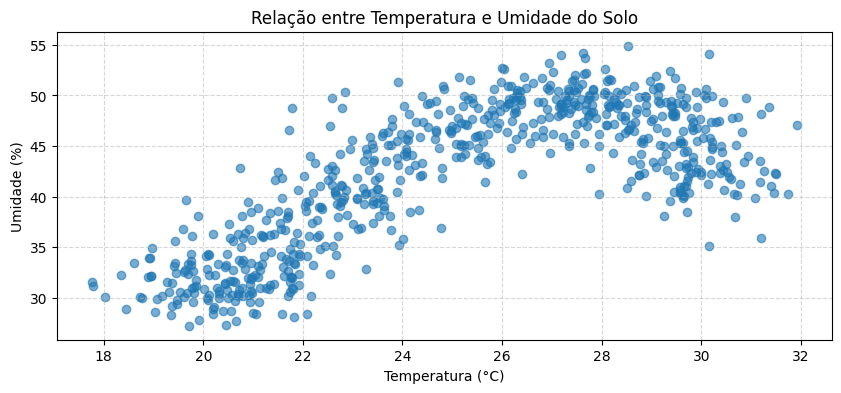

In [11]:
# 7. Scatter plot: umidade vs. temperatura
plt.figure(figsize=(10,4))
plt.scatter(df['temperature'], df['soil_moisture'], alpha=0.6)
plt.title('Relação entre Temperatura e Umidade do Solo')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [12]:
# ❓ 5. Valores faltantes e outliers
print("Valores faltantes:\n", df.isna().sum())
# Exemplo simples de detecção de outliers (z-score)
from scipy import stats
z_scores = np.abs(stats.zscore(df[['soil_moisture','temperature']].dropna()))
outliers = (z_scores > 3).any(axis=1)
print(f"Número de outliers detectados: {outliers.sum()}")

Valores faltantes:
 timestamp        0
soil_moisture    0
temperature      0
dtype: int64
Número de outliers detectados: 0
